In [62]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
dataset_dir = 'D:/eksperimen/appweb/code/imageprocessing/asl_dataset'

In [64]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=10,    
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    shear_range=0.1,        
    zoom_range=0.1,         
    horizontal_flip=True,  
)

In [65]:
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(400, 400),
    batch_size=32,
    class_mode='sparse',  
    subset='training', 
    shuffle=True 
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(400, 400),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 1761 images belonging to 36 classes.
Found 754 images belonging to 36 classes.


In [67]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Ganti Flatten dengan GlobalAveragePooling untuk mencegah error input size
    GlobalAveragePooling2D(),

    Dense(64, activation='relu'),
    Dense(36, activation='softmax')  # 36 kelas: 0-9 dan a-z
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=16,  
    callbacks=[early_stop]  
)


Epoch 1/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.0224 - loss: 3.5865
Epoch 2/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.0349 - loss: 3.5819
Epoch 3/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.0540 - loss: 3.5577
Epoch 4/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.0744 - loss: 3.2606
Epoch 5/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.1277 - loss: 2.9372
Epoch 6/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.1811 - loss: 2.6660
Epoch 7/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.1935 - loss: 2.5069
Epoch 8/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.2041 - loss: 2.3840
Epoch 9/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.2174 - loss: 2.3332
Epoch 10/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.2052 - loss: 2.2611
Epoch 11/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.2230 - loss: 2.2366
Epoch 12/16
56/56 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.2390 -

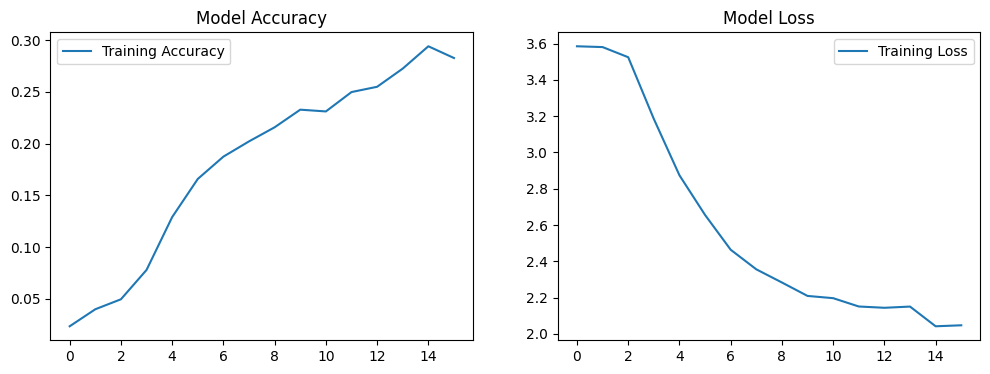

In [71]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [72]:
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=val_generator.class_indices.keys()))

24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 771ms/step
Confusion Matrix
[[0 0 0 ... 0 0 1]
 [1 1 1 ... 2 0 0]
 [0 0 1 ... 1 0 2]
 ...
 [0 1 2 ... 2 0 1]
 [1 0 2 ... 1 0 1]
 [0 2 1 ... 2 2 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.06      0.05      0.05        21
           2       0.02      0.05      0.03        21
           3       0.00      0.00      0.00        21
           4       0.04      0.10      0.05        21
           5       0.25      0.05      0.08        21
           6       0.00      0.00      0.00        21
           7       0.04      0.10      0.06        21
           8       0.00      0.00      0.00        21
           9       0.10      0.05      0.06        21
           a       0.14      0.10      0.11        21
           b       0.00      0.00      0.00        21
           c       0.00      0.00      0.00        21
           d       0.08      0.05      0.0

d:\eksperimen\appweb\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\eksperimen\appweb\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\eksperimen\appweb\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
model.save('trainmodel.keras')